# CN - Ex2 - Toy networks
## Author: Aleix Solanes

In [24]:
import igraph,cairo
import community
import louvain
import networkx as nx

# function to export to .clu by a received list of numbers that refer to a cluster
def export_to_clu(list1,file_name):
    out = '*Vertices ' + str(len(list1)) + '\n'
    for a in list1:
        out += str(a+1)+'\n'
    text_file = open(file_name, "w")
    text_file.write(out)
    text_file.close()

In [25]:
# toy
net_net20x2 = igraph.read("networks/toy/20x2+5x2.net",format="pajek")
net_net313 = igraph.read("networks/toy/graph3+1+3.net",format="pajek")
net_net4x4 = igraph.read("networks/toy/graph4+4.net",format="pajek")
net_star = igraph.read("networks/toy/star.net",format="pajek")

clu_20x2 = igraph.read("networks/toy/20x2+5x2.clu",format="pajek")
clu_313 = igraph.read("networks/toy/graph3+1+3.clu",format="pajek")
clu_4x4 = igraph.read("networks/toy/graph4+4.clu",format="pajek")
clu_star = igraph.read("networks/toy/star.clu",format="pajek")

## 20x2+5x2

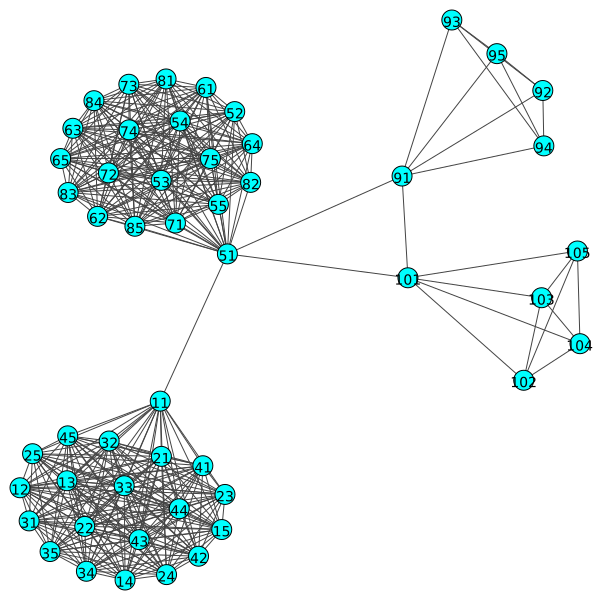

In [26]:
net20x2_layout = net_net20x2.layout("kk")
labels = [vertex['id'] for vertex in net_net20x2.vs]
igraph.plot(net_net20x2, "net_20x2.png", vertex_color="cyan", vertex_label = labels, layout = net20x2_layout)

Community:
Clustering with 50 elements and 3 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
[1] 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
    38, 39
[2] 40, 41, 42, 43, 44, 45, 46, 47, 48, 49
Membership:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Number of communities: 3
Modularity: 0.542578546221


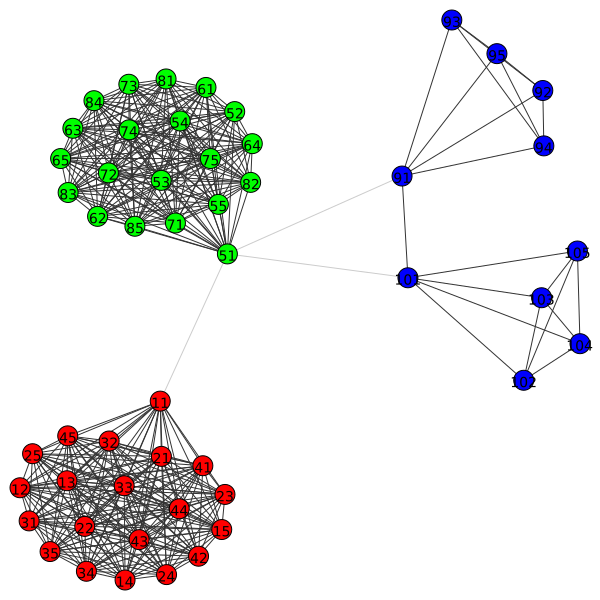

In [27]:
# Community multilevel
com_net20x2 = net_net20x2.community_multilevel()
print "Community:"
print com_net20x2
print "Membership:"
print com_net20x2.membership
print "Number of communities:", max(com_net20x2.membership)+1
mem_net20x2 = com_net20x2.membership
print "Modularity:", com_net20x2.modularity
export_to_clu(com_net20x2.membership,"clu_multilevel_net20x2.clu")
igraph.plot(com_net20x2,"clu_multilevel_net20x2.png", vertex_label=labels,layout = net20x2_layout)


Optimal number of clusters: 3
Community:
Clustering with 50 elements and 3 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
[1] 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
    38, 39
[2] 40, 41, 42, 43, 44, 45, 46, 47, 48, 49
Membership:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Number of communities: 3
Modularity: 0.542578546221


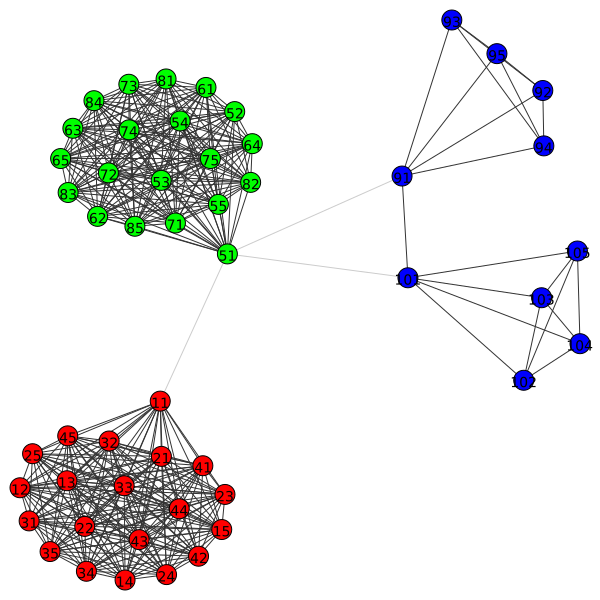

In [28]:
# Community fast-greedy
# simplified to avoid multiple edges in same node pair
com_net20x2 = net_net20x2.simplify().community_fastgreedy().as_clustering()
print "Optimal number of clusters:",net_net20x2.community_fastgreedy().optimal_count
print "Community:"
print com_net20x2
print "Membership:"
print com_net20x2.membership
print "Number of communities:", max(com_net20x2.membership)+1
mem_net20x2 = com_net20x2.membership
print "Modularity:", com_net20x2.modularity
export_to_clu(com_net20x2.membership,"clu_fastgreedy_net20x2.clu")
igraph.plot(com_net20x2,"clu_fastgreedy_net20x2.png", vertex_label=labels,layout = net20x2_layout)


Community:
Clustering with 50 elements and 3 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
[1] 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
    38, 39
[2] 40, 41, 42, 43, 44, 45, 46, 47, 48, 49
Quality: 846.668765315
Modularity: 0.542578546221


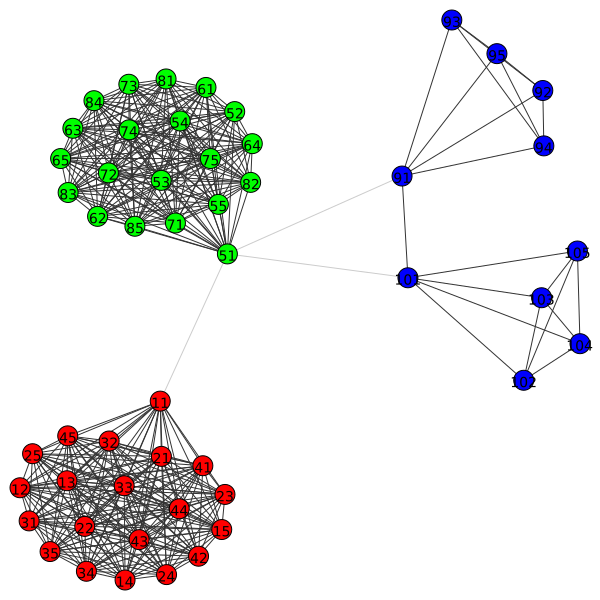

In [29]:
# Louvain
com_net20x2 = louvain.find_partition(net_net20x2, method='Modularity')
print "Community:"
print com_net20x2
print "Quality:", louvain.quality(net_net20x2, com_net20x2, method='Significance')
print "Modularity:", com_net20x2.modularity
export_to_clu(com_net20x2.membership,"clu_louvain_net20x2.clu")
igraph.plot(com_net20x2,"clu_louvain_net20x2.png", vertex_label=labels,layout = net20x2_layout)

## Graph3+1+3

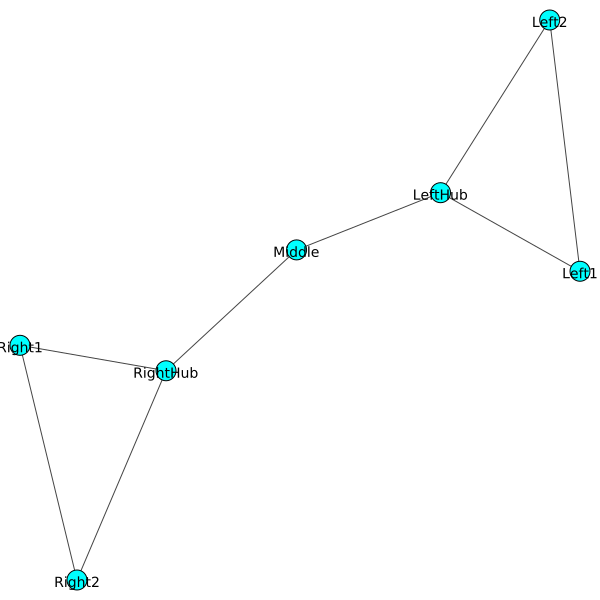

In [30]:
net313_layout = net_net313.layout("kk")
labels = [vertex['id'] for vertex in net_net313.vs]
igraph.plot(net_net313, "net_313.png", vertex_color="cyan", vertex_label = labels, layout = net313_layout)

Community:
Clustering with 7 elements and 2 clusters
[0] 0, 1, 2, 3
[1] 4, 5, 6
Membership:
[0, 0, 0, 0, 1, 1, 1]
Number of communities: 2
Modularity: 0.3671875


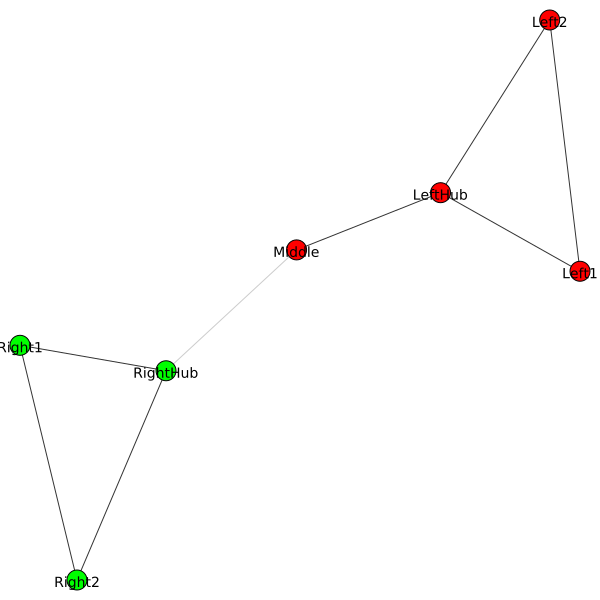

In [31]:
# Community multilevel
com_net313 = net_net313.community_multilevel()
print "Community:"
print com_net313
print "Membership:"
print com_net313.membership
print "Number of communities:", max(com_net313.membership)+1
mem_net313 = com_net313.membership
print "Modularity:", com_net313.modularity
export_to_clu(com_net313.membership,"clu_multilevel_net313.clu")
igraph.plot(com_net313,"clu_multilevel_net313.png", vertex_label=labels,layout = net313_layout)

Optimal number of clusters: 2
Community:
Clustering with 7 elements and 2 clusters
[0] 0, 1, 2, 3
[1] 4, 5, 6
Membership:
[0, 0, 0, 0, 1, 1, 1]
Number of communities: 2
Modularity: 0.3671875


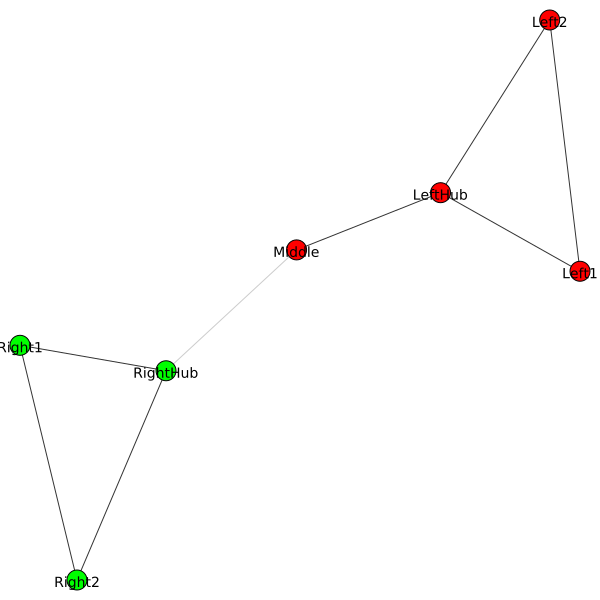

In [32]:
# Community fast-greedy
# simplified to avoid multiple edges in same node pair
com_net313 = net_net313.simplify().community_fastgreedy().as_clustering()
print "Optimal number of clusters:",net_net313.community_fastgreedy().optimal_count
print "Community:"
print com_net313
print "Membership:"
print com_net313.membership
print "Number of communities:", max(com_net313.membership)+1
mem_net313 = com_net313.membership
print "Modularity:", com_net313.modularity
export_to_clu(com_net313.membership,"clu_fastgreedy_net313.clu")
igraph.plot(com_net313,"clu_fastgreedy_net313.png", vertex_label=labels,layout = net313_layout)

Community:
Clustering with 7 elements and 2 clusters
[0] 0, 1, 2, 3
[1] 4, 5, 6
Quality: 7.79125484612
Modularity: 0.3671875


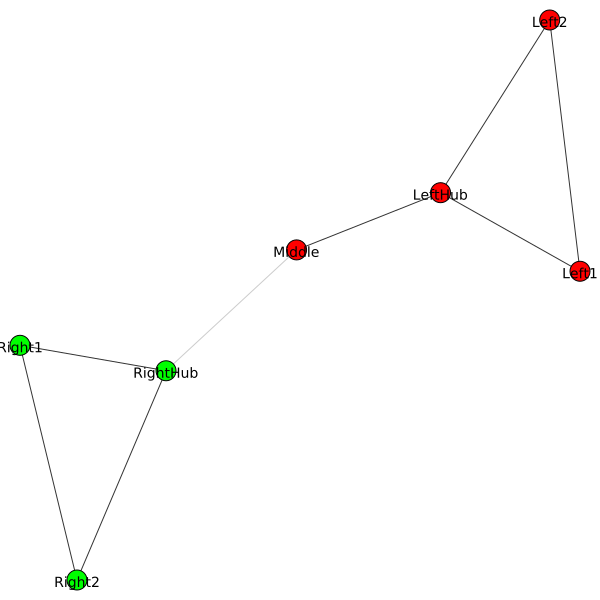

In [33]:
# Louvain
com_net313 = louvain.find_partition(net_net313, method='Modularity')
print "Community:"
print com_net313
print "Quality:", louvain.quality(net_net313, com_net313, method='Significance')
print "Modularity:", com_net313.modularity
export_to_clu(com_net313.membership,"clu_louvain_net313.clu")
igraph.plot(com_net313,"clu_louvain_net313.png", vertex_label=labels,layout = net313_layout)

## Graph4+4

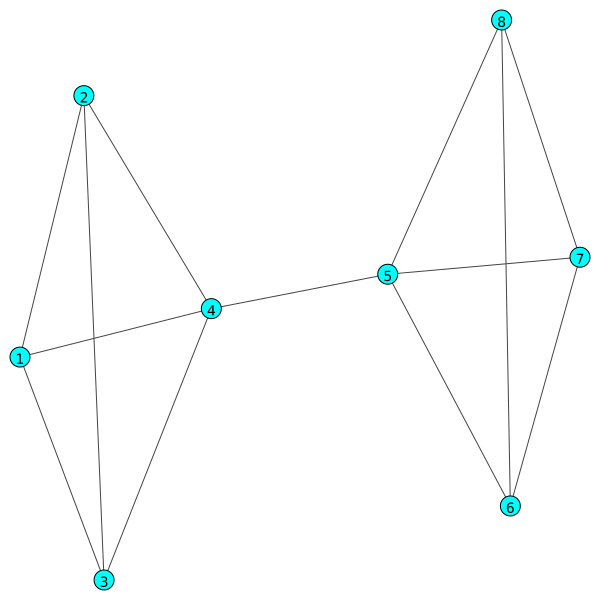

In [34]:
net4x4_layout = net_net4x4.layout("kk")
labels = [vertex['id'] for vertex in net_net4x4.vs]
igraph.plot(net_net4x4, "net_4x4.png", vertex_color="cyan", vertex_label = labels, layout = net4x4_layout)

Community:
Clustering with 8 elements and 2 clusters
[0] 0, 1, 2, 3
[1] 4, 5, 6, 7
Membership:
[0, 0, 0, 0, 1, 1, 1, 1]
Number of communities: 2
Modularity: 0.423076923077


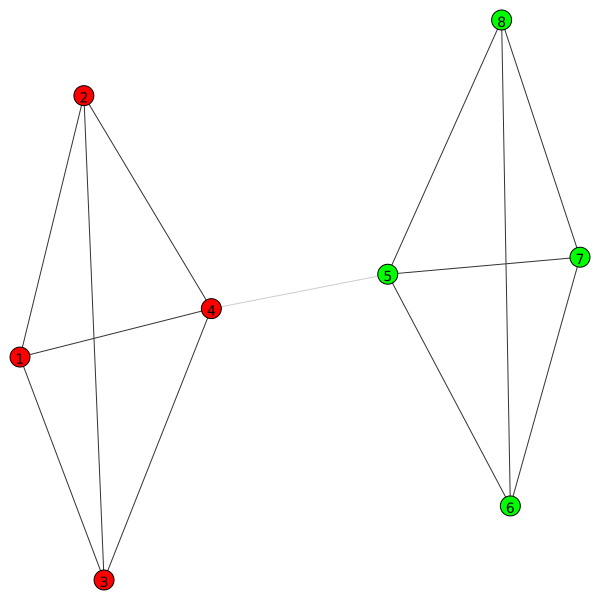

In [35]:
# Community multilevel
com_net4x4 = net_net4x4.community_multilevel()
print "Community:"
print com_net4x4
print "Membership:"
print com_net4x4.membership
print "Number of communities:", max(com_net4x4.membership)+1
mem_net4x4 = com_net4x4.membership
print "Modularity:", com_net4x4.modularity
export_to_clu(com_net4x4.membership,"clu_multilevel_net4x4.clu")
igraph.plot(com_net4x4,"clu_multilevel_net4x4.png", vertex_label=labels,layout = net4x4_layout)

Optimal number of clusters: 2
Community:
Clustering with 8 elements and 2 clusters
[0] 0, 1, 2, 3
[1] 4, 5, 6, 7
Membership:
[0, 0, 0, 0, 1, 1, 1, 1]
Number of communities: 2
Modularity: 0.423076923077


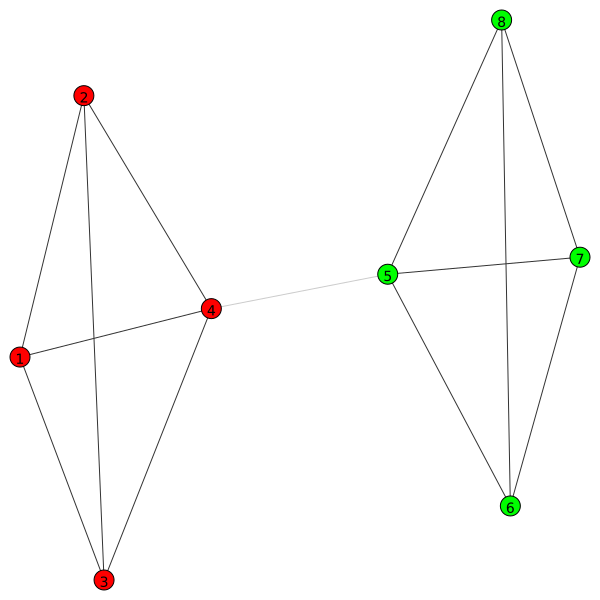

In [36]:
# Community fast-greedy
# simplified to avoid multiple edges in same node pair
com_net4x4 = net_net4x4.simplify().community_fastgreedy().as_clustering()
print "Optimal number of clusters:",net_net4x4.community_fastgreedy().optimal_count
print "Community:"
print com_net4x4
print "Membership:"
print com_net4x4.membership
print "Number of communities:", max(com_net4x4.membership)+1
mem_net4x4 = com_net4x4.membership
print "Modularity:", com_net4x4.modularity
export_to_clu(com_net4x4.membership,"clu_fastgreedy_net4x4.clu")
igraph.plot(com_net4x4,"clu_fastgreedy_net4x4.png", vertex_label=labels,layout = net4x4_layout)

Community:
Clustering with 8 elements and 2 clusters
[0] 4, 5, 6, 7
[1] 0, 1, 2, 3
Quality: 18.4141236651
Modularity: 0.423076923077


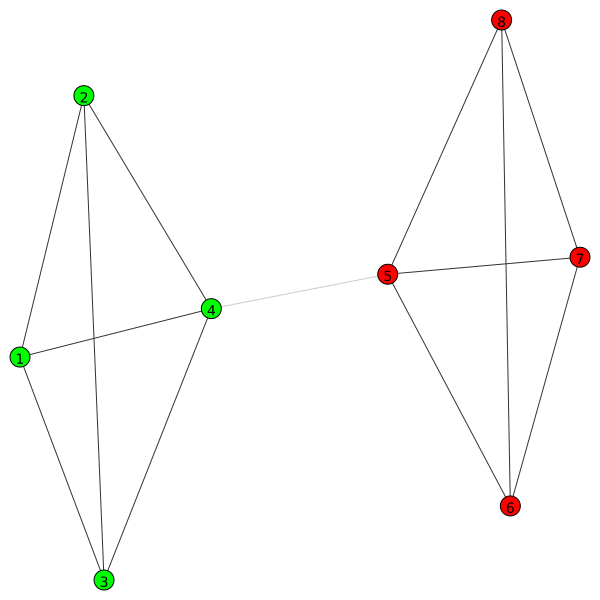

In [37]:
# Louvain
com_net4x4 = louvain.find_partition(net_net4x4, method='Modularity')
print "Community:"
print com_net4x4
print "Quality:", louvain.quality(net_net4x4, com_net4x4, method='Significance')
print "Modularity:", com_net4x4.modularity
export_to_clu(com_net4x4.membership,"clu_louvain_net4x4.clu")
igraph.plot(com_net4x4,"clu_louvain_net4x4.png", vertex_label=labels,layout = net4x4_layout)

## Star

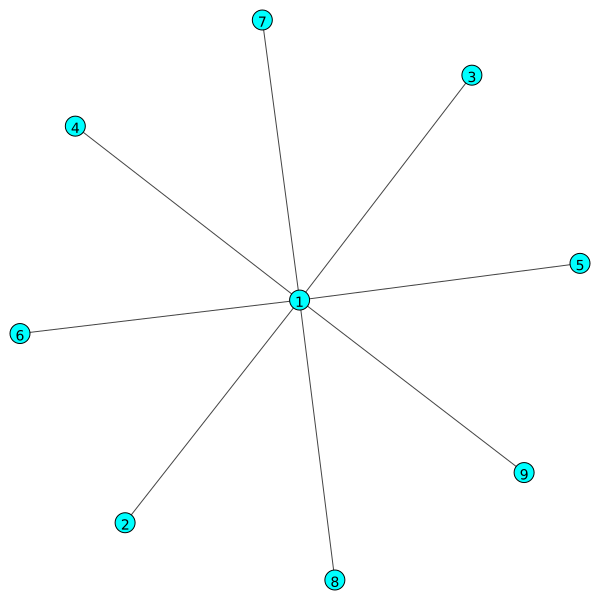

In [38]:
star_layout = net_star.layout("kk")
labels = [vertex['id'] for vertex in net_star.vs]
igraph.plot(net_star, "net_star.png", vertex_color="cyan", vertex_label = labels, layout = star_layout)

Community:
Clustering with 9 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8
Membership:
[0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of communities: 1
Modularity: 0.0


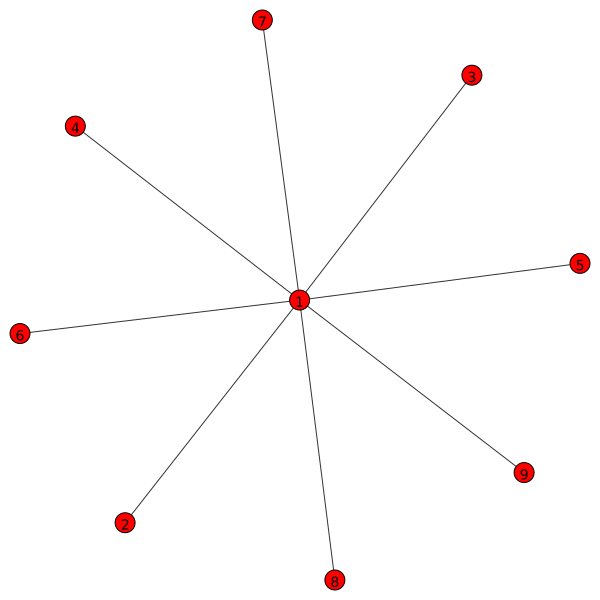

In [39]:
# Community multilevel
com_star = net_star.community_multilevel()
print "Community:"
print com_star
print "Membership:"
print com_star.membership
print "Number of communities:", max(com_star.membership)+1
mem_star = com_star.membership
print "Modularity:", com_star.modularity
export_to_clu(com_star.membership,"clu_multilevel_star.clu")
igraph.plot(com_star,"clu_multilevel_star.png", vertex_label=labels,layout = star_layout)

Optimal number of clusters: 1
Community:
Clustering with 9 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8
Membership:
[0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of communities: 1
Modularity: 0.0


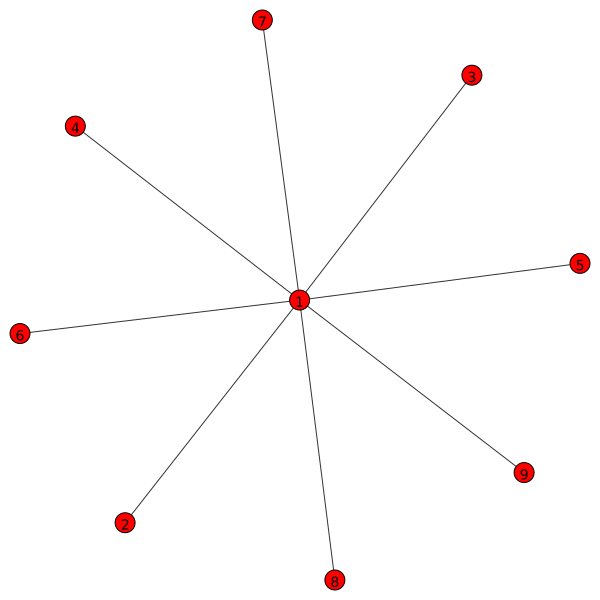

In [40]:
# Community fast-greedy
# simplified to avoid multiple edges in same node pair
com_star = net_star.simplify().community_fastgreedy().as_clustering()
print "Optimal number of clusters:",net_star.community_fastgreedy().optimal_count
print "Community:"
print com_star
print "Membership:"
print com_star.membership
print "Number of communities:", max(com_star.membership)+1
mem_star = com_star.membership
print "Modularity:", com_star.modularity
export_to_clu(com_star.membership,"clu_fastgreedy_star.clu")
igraph.plot(com_star,"clu_fastgreedy_star.png", vertex_label=labels,layout = star_layout)

Community:
Clustering with 9 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8
Quality: 0.0
Modularity: 0.0


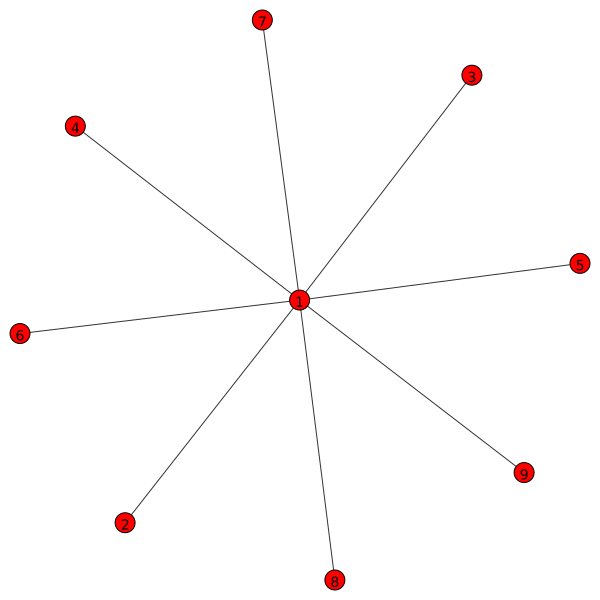

In [41]:
# Louvain
com_star = louvain.find_partition(net_star, method='Modularity')
print "Community:"
print com_star
print "Quality:", louvain.quality(net_star, com_star, method='Significance')
print "Modularity:", com_star.modularity
export_to_clu(com_star.membership,"clu_louvain_star.clu")
igraph.plot(com_star,"clu_louvain_star.png", vertex_label=labels,layout = star_layout)